In [9]:
import pyteomics
import lxml
from pyteomics import mzml, mass
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import pyplot
import matplotlib
import seaborn as sns
import re
import venn

In [10]:
sample=[2,4,6,8,3]

def remove_dul(tar_list=sample):
    res=[]
    [res.append(x) for x in tar_list if x not in res]
    return(res)


def average(sample):
    return sum(sample) / len(sample)


def procount(dir='E:\\yuming\\2023\\20230118\\csodiaq\\DD'):
    plasma_pro = []
    for file in os.listdir(dir):
        if file.endswith(".csv") and 'proteinFDR' in file:
            plasma_pro.append(os.path.join(dir, file))
    dic={}
    for i in range(len(plasma_pro)):
        df=pd.read_csv(plasma_pro[i]) 
        yummy=len(remove_dul(tar_list=df['protein'].tolist()))
        dic[str(plasma_pro[i].split('\\')[-1])]=yummy
        dfnew=pd.DataFrame.from_dict(dic, orient='index')
    return(dfnew)
def pepcount(dir='E:\\yuming\\2023\\20230118\\csodiaq\\DD'):
    plasma_pro = []
    for file in os.listdir(dir):
        if file.endswith(".csv") and 'proteinFDR' in file:
            plasma_pro.append(os.path.join(dir, file))
    dic={}
    for i in range(len(plasma_pro)):
        df=pd.read_csv(plasma_pro[i]) 
        yummy=len(remove_dul(tar_list=df['peptide'].tolist()))
        dic[str(plasma_pro[i].split('\\')[-1])]=yummy
        dfnew=pd.DataFrame.from_dict(dic, orient='index')
    return(dfnew)

def count(dir='E:\\yuming\\2023\\20230118\\csodiaq\\DD'):
    ['''count the protein ID from a .csv file''']
    plasma_pro = []
    for file in os.listdir(dir):
        if file.endswith(".csv") and 'proteinFDR' in file:
            plasma_pro.append(os.path.join(dir, file))
    pro_number=[]
    for i in range(len(plasma_pro)):
        df=pd.read_csv(plasma_pro[i]) 
        pro_number.append(len(remove_dul(tar_list=df['protein'].tolist())))
    pro_number 
    return(pro_number) 


def plot_sin_np(title='NP5',figname='pros_np5',listname=procount(dir="E:\\yuming\\2023\\20230130\\NP5\\csodiaq").iloc[:,0].tolist()):
    prolist_np=[average(listname[:3]),average(listname[3:6]),average(listname[6:9]),average(listname[9:12])]
    np_std=[np.std(listname[:3]),np.std(listname[3:6]),np.std(listname[6:9]),np.std(listname[9:12])]
    name2=['1','0.5','0.25','0.125']
    sns.set_theme(style="ticks")
    plt.figure(figsize=(6,4),edgecolor="#04253a")
    matplotlib.rcParams['font.family'] = "Arial"
    bar_width=0.5
    plt.bar(x=name2,height=prolist_np,yerr=np_std,color='firebrick',alpha=0.8,width=bar_width,capsize=5,label=title)
    #plt.errorbar(name2,prolist_np5,yerr=np5_std,color='firebrick',label='NP5', marker='o',ms = 5,linewidth=2,capsize=6,linestyle='dotted')
    plt.xlabel('Concentration',fontsize=24)
    plt.ylabel('Number of proteins',fontsize=24)
    plt.title(title,fontsize=24)
    plt.xticks(fontsize=20)
    #plt.xticks(rotation=20)
    plt.yticks(fontsize=22)
    #plt.xticks(np.arange(0, 24, 4))
    plt.yticks(np.arange(0,400, 100))
    #plt.xlim(7.8,23)
    plt.ylim(0,400)
    plt.legend(fontsize=20)
    plt.grid()
    plt.subplots_adjust(left=0.25,bottom=0.2)
    #plt.tight_layout()
    #plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
    #plt.savefig('D:\\Project 2 DIrect infusion shotgun proteome analysis\\robust and reproducibility\\CV analysis_protein.svg', dpi=600) 
    fig_path= 'E:\\project6 rapid profiling plasma peptides\\figures\\'
    plt.savefig(fig_path + "%s.svg" % figname,dpi=600, bbox_inches='tight')  
    plt.show()

def plot_pep_np(title='NP5',figname='pros_np5',listname=pepcount(dir="E:\\yuming\\2023\\20230130\\NP5\\csodiaq").iloc[:,0].tolist()):
    prolist_np=[average(listname[:3]),average(listname[3:6]),average(listname[6:9]),average(listname[9:12])]
    np_std=[np.std(listname[:3]),np.std(listname[3:6]),np.std(listname[6:9]),np.std(listname[9:12])]
    name2=['1','0.5','0.25','0.125']
    sns.set_theme(style="ticks")
    plt.figure(figsize=(6,4),edgecolor="#04253a")
    matplotlib.rcParams['font.family'] = "Arial"
    bar_width=0.5
    plt.bar(x=name2,height=prolist_np,yerr=np_std,color='firebrick',alpha=0.8,width=bar_width,capsize=5,label=title)
    #plt.errorbar(name2,prolist_np5,yerr=np5_std,color='firebrick',label='NP5', marker='o',ms = 5,linewidth=2,capsize=6,linestyle='dotted')
    plt.xlabel('Concentration',fontsize=24)
    plt.ylabel('Number of proteins',fontsize=24)
    plt.title(title,fontsize=24)
    plt.xticks(fontsize=20)
    #plt.xticks(rotation=20)
    plt.yticks(fontsize=22)
    #plt.xticks(np.arange(0, 24, 4))
    plt.yticks(np.arange(0,1500, 500))
    #plt.xlim(7.8,23)
    plt.ylim(0,1500)
    plt.legend(fontsize=20)
    plt.grid()
    plt.subplots_adjust(left=0.25,bottom=0.2)
    #plt.tight_layout()
    #plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
    #plt.savefig('D:\\Project 2 DIrect infusion shotgun proteome analysis\\robust and reproducibility\\CV analysis_protein.svg', dpi=600) 
    fig_path= 'E:\\project6 rapid profiling plasma peptides\\figures\\'
    plt.savefig(fig_path + "%s.svg" % figname,dpi=600, bbox_inches='tight')  
    plt.show()


In [21]:
#procount(dir="E:\\yuming\\2023\\20230226\\csodiaq")

In [20]:
#procount(dir="E:\\yuming\\2023\\20230130\\NP5\\csodiaq")

In [11]:
# targeted results among different NPs

listnp5=procount(dir="E:\\yuming\\2023\\20230130\\NP5\\csodiaq").iloc[:,0].tolist()
listnp4=procount(dir="E:\\yuming\\2023\\20230130\\NP4\\csodiaq").iloc[:,0].tolist()
listnp3=procount(dir="E:\\yuming\\2023\\20230129\\NP3\\New folder\\csodiaq2").iloc[:,0].tolist()
listnp2=procount(dir="E:\\yuming\\2023\\20230129\\NP2\\csodiaq").iloc[:,0].tolist()
listnp1=procount(dir="E:\\yuming\\2023\\20230129\\NP1\\csodiaq").iloc[:,0].tolist()
listdd=procount(dir="E:\\yuming\\2023\\20230118\\csodiaq\\DD").iloc[:,0].tolist()



In [14]:
listnp4

[234, 234, 247, 221, 215, 190, 201, 195, 204, 186, 189, 203]

In [19]:

def prolist(dir='E:\\yuming\\2023\\20230118\\csodiaq\\DD'):
    plasma_pro = []
    for file in os.listdir(dir):
        if file.endswith(".csv") and 'proteinFDR' in file:
            plasma_pro.append(os.path.join(dir, file))
    dic={}
    for i in range(len(plasma_pro)):
        df=pd.read_csv(plasma_pro[i]) 
        yummy=remove_dul(tar_list=df['protein'].tolist())
        dic[str(i)]=yummy
    return(dic)

In [26]:
prolist(dir="E:\\yuming\\2023\\20230130\\NP5\\csodiaq")['0']

['2/sp|P33260|CP2CI_HUMAN/sp|P10632|CP2C8_HUMAN',
 '10/sp|Q9H4B7|TBB1_HUMAN/sp|Q9BVA1|TBB2B_HUMAN/sp|Q9BUF5|TBB6_HUMAN/sp|Q3ZCM7|TBB8_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|Q13509|TBB3_HUMAN/sp|P68371|TBB4B_HUMAN/sp|P07437|TBB5_HUMAN/sp|P04350|TBB4A_HUMAN/sp|A6NNZ2|TBB8B_HUMAN',
 '7/sp|Q9BVA1|TBB2B_HUMAN/sp|Q3ZCM7|TBB8_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|P68371|TBB4B_HUMAN/sp|P07437|TBB5_HUMAN/sp|P04350|TBB4A_HUMAN/sp|A6NNZ2|TBB8B_HUMAN',
 '1/sp|P02679|FIBG_HUMAN',
 '2/sp|P02679|FIBG_HUMAN/rev_sp|P02679|FIBG_HUMAN',
 '1/sp|Q13103|SPP24_HUMAN',
 '1/sp|P01024|CO3_HUMAN',
 '2/sp|Q9BXY5|CAYP2_HUMAN/sp|P01024|CO3_HUMAN',
 '3/sp|P01031|CO5_HUMAN/sp|A8K2U0|A2ML1_HUMAN/sp|P01024|CO3_HUMAN',
 '1/sp|P19823|ITIH2_HUMAN',
 '2/sp|P12270|TPR_HUMAN/sp|P19823|ITIH2_HUMAN',
 '1/sp|P02655|APOC2_HUMAN',
 '2/sp|Q8N6G6|ATL1_HUMAN/sp|P02655|APOC2_HUMAN',
 '1/sp|P01619|KV320_HUMAN',
 '2/sp|P01619|KV320_HUMAN/sp|A0A0C4DH25|KVD20_HUMAN',
 '1/sp|P02760|AMBP_HUMAN',
 '1/sp|P02749|APOH_HUMAN',
 '1/sp|P48740|MASP1_HUMAN',
 '1/

In [32]:
namelist=['0','1','2','3','4','5','6']

haha=[]

for nameq in namelist:

    pron_np5=prolist(dir="E:\\yuming\\2023\\20230130\\NP5\\csodiaq")[nameq]
    pron_np4=prolist(dir="E:\\yuming\\2023\\20230130\\NP4\\csodiaq")[nameq]
    pron_np3=prolist(dir="E:\\yuming\\2023\\20230129\\NP3\\New folder\\csodiaq2")[nameq]
    pron_np2=prolist(dir="E:\\yuming\\2023\\20230129\\NP2\\csodiaq")[nameq]
    pron_np1=prolist(dir="E:\\yuming\\2023\\20230129\\NP1\\csodiaq")[nameq]
    pron_dd=prolist(dir="E:\\yuming\\2023\\20230118\\csodiaq\\DD")[nameq]


    final_count= len(remove_dul(pron_np5+pron_np4+pron_np3+pron_np2+pron_np1))
    haha.append(final_count)
haha

[459, 466, 456, 439, 414, 423, 418]

In [4]:
name=['DD','NP1','NP2','NP3','NP4','NP5']


quan_error2=[np.std(listdd[:3]),np.std(listnp1[:3]),np.std(listnp2[:3]),np.std(listnp3[:3]),np.std(listnp4[:3]),np.std(listnp5[:3])]

pro_quan2=[average(listdd[:3]),average(listnp1[:3]),average(listnp2[:3]),average(listnp3[:3]),average(listnp4[:3]),average(listnp5[:3])]


In [5]:
pro_quan2

[212.0, 207.66666666666666, 278.0, 265.0, 238.33333333333334, 278.0]

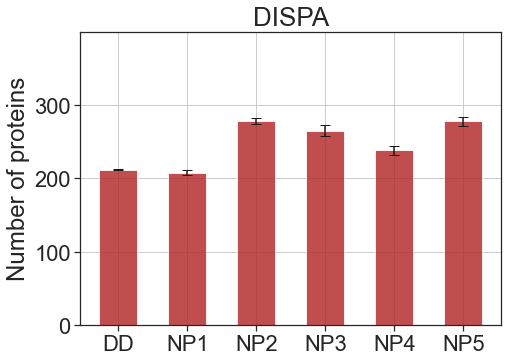

In [5]:
sns.set_theme(style="ticks")
plt.figure(figsize=(9,6),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
bar_width=0.55
plt.bar(x=name,height=pro_quan2,yerr=quan_error2,color='firebrick',alpha=0.8,width=bar_width,capsize=5)
#plt.xlabel('Treatment',fontsize=24)
plt.ylabel('Number of proteins',fontsize=24)
plt.title('DISPA',fontsize=26)
plt.xticks(fontsize=22)
#plt.xticks(rotation=20)
plt.yticks(fontsize=22)
#plt.xticks(np.arange(0, 24, 4))
plt.yticks(np.arange(0,400, 100))
#plt.xlim(7.8,23)
plt.ylim(0,400)
#plt.legend(fontsize=20,frameon=False)
plt.grid()
plt.subplots_adjust(left=0.25,bottom=0.2)
#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
#plt.savefig('D:\\project6_rapid profiling plasma peptides\\figures\\Pro_quan_targeted.svg', dpi=800) 
plt.show()

In [6]:
procount(dir='E:\\yuming\\2023\\20230214\\csodiaq')

,0
CsoDIAq-file1_DDscout_corrected_proteinFDR.csv,245
CsoDIAq-file2_NP1scout_corrected_proteinFDR.csv,255
CsoDIAq-file3_NP1scout_2_corrected_proteinFDR.csv,240
CsoDIAq-file4_NP2scout_corrected_proteinFDR.csv,320
CsoDIAq-file5_NP2scout_2_corrected_proteinFDR.csv,247
CsoDIAq-file6_NP3scout_corrected_proteinFDR.csv,309
CsoDIAq-file7_NP4scout_corrected_proteinFDR.csv,322
CsoDIAq-file8_NP5scout_corrected_proteinFDR.csv,271
CsoDIAq-file9_NP5scout_2_corrected_proteinFDR.csv,298


In [7]:
procount(dir='E:\\yuming\\2023\\20230116\\csodiaq')

,0
CsoDIAq-file1_DD_2_SCOUT_corrected_proteinFDR.csv,262
CsoDIAq-file2_NP1_2_SCOUT_corrected_proteinFDR.csv,266
CsoDIAq-file3_NP2_2_SCOUT_corrected_proteinFDR.csv,333
CsoDIAq-file4_NP3_2_SCOUT_corrected_proteinFDR.csv,346
CsoDIAq-file5_NP4_2_SCOUT_corrected_proteinFDR.csv,293
CsoDIAq-file6_NP5_2_SCOUT_corrected_proteinFDR.csv,352


In [8]:
procount(dir='E:\\yuming\\2023\\20230117\\csodiaq')

,0
CsoDIAq-file1_SCOUT_DD_corrected_proteinFDR.csv,244
CsoDIAq-file2_SCOUT_NP1_corrected_proteinFDR.csv,248
CsoDIAq-file3_SCOUT_NP2_corrected_proteinFDR.csv,246
CsoDIAq-file4_SCOUT_NP3_corrected_proteinFDR.csv,284
CsoDIAq-file5_SCOUT_NP4_corrected_proteinFDR.csv,274
CsoDIAq-file6_SCOUT_NP5_corrected_proteinFDR.csv,263


In [9]:
procount(dir='E:\\yuming\\2022\\20221121\\csodiaq2')

,0
CsoDIAq-file1_DD_corrected_proteinFDR.csv,211
CsoDIAq-file2_NP1_20221122162149_corrected_proteinFDR.csv,273
CsoDIAq-file3_NP2_20221122164010_corrected_proteinFDR.csv,274
CsoDIAq-file4_NP3_20221122181437_corrected_proteinFDR.csv,278
CsoDIAq-file5_NP4_corrected_proteinFDR.csv,297
CsoDIAq-file6_NP5_corrected_proteinFDR.csv,283


In [53]:
NP1=[273,307,266]
NP2=[393,353,320]
NP3=[341,346,319]
NP4=[348,322,313]
NP5=[352,361,298]
DD=[254,262,245]
all_NPs=[459, 466, 456]
         
name=['NP1','NP2','nNP3','NP4','NP5','all_NPs','DD']

quan_error=[np.std(NP1),np.std(NP2),np.std(NP3),np.std(NP4),np.std(NP5),np.std(all_NPs),np.std(DD)]

pro_quan=[average(NP1),average(NP2),average(NP3),average(NP4),average(NP5),average(all_NPs),average(DD)]



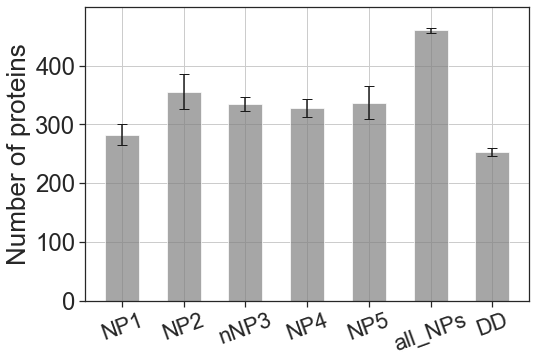

In [54]:
# protein identifications from different NPs  ---scouting experiments

sns.set_theme(style="ticks")
plt.figure(figsize=(9.5,6),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
bar_width=0.55
plt.bar(x=name,height=pro_quan,yerr=quan_error,color='grey',alpha=0.7,width=bar_width,capsize=5)

#plt.xlabel('Treatment',fontsize=24)
plt.ylabel('Number of proteins',fontsize=26)
#plt.title('DISPA',fontsize=26)
#plt.xticks(fontsize=22)
#plt.xticks(rotation=20)
plt.xticks(name,fontsize=22,rotation=20)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 24, 4))

plt.yticks(np.arange(0,500, 100))
#plt.xlim(7.8,23)
plt.ylim(0,500)
#plt.legend(fontsize=20,frameon=False)
plt.grid()
#plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.25,bottom=0.2)
#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
plt.savefig('F:\\Seer_project\\figures\\Pro_quan_scout2.svg', dpi=800) 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


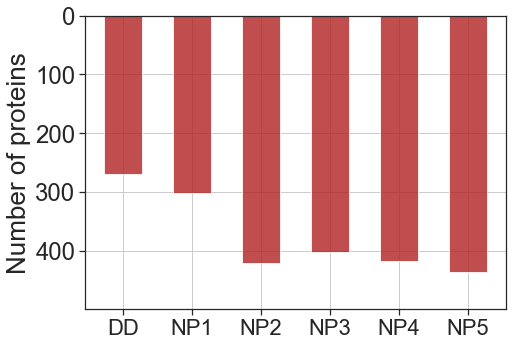

In [36]:
# protein IDS from DDA LC-MS/MS
proID_DDA=[269, 302, 421, 403, 418, 437]

name=['DD','NP1','NP2','NP3','NP4','NP5']

sns.set_theme(style="ticks")
plt.figure(figsize=(9,6),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
bar_width=0.55
plt.bar(x=name,height=proID_DDA,color='firebrick',alpha=0.8,width=bar_width)
#plt.xlabel('treatment',fontsize=24)
plt.ylabel('Number of proteins',fontsize=26)
#plt.title('DDA_LC_MS/MS',fontsize=26)
plt.xticks(fontsize=22)
#plt.xticks(rotation=20)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 24, 4))
plt.yticks(np.arange(0,500, 100))
#plt.xlim(7.8,23)
plt.ylim(0,500)
plt.legend(fontsize=20,frameon=False)
plt.grid()
plt.subplots_adjust(left=0.25,bottom=0.2)
plt.gca().invert_yaxis()
#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
plt.savefig('F:\\Seer_project\\figures\\Pro_quan_LC.svg', dpi=800) 
plt.show()

In [6]:
pep_NP1=[1788,1917,1929]
pep_NP2=[2042,2074,2133]
pep_NP3=[1976,2315,1965]
pep_NP4=[2029,2202,1863]
pep_NP5=[2183,2426,2430]
pep_DD=[1760,1846,1821]


pep_quan_error=[np.std(pep_DD),np.std(pep_NP1),np.std(pep_NP2),np.std(pep_NP3),np.std(pep_NP4),np.std(pep_NP5)]


pep_quan=[average(pep_DD),average(pep_NP1),average(pep_NP2),average(pep_NP3),average(pep_NP4),average(pep_NP5)]

In [7]:
pep_quan

[1809.0,
 1878.0,
 2083.0,
 2085.3333333333335,
 2031.3333333333333,
 2346.3333333333335]

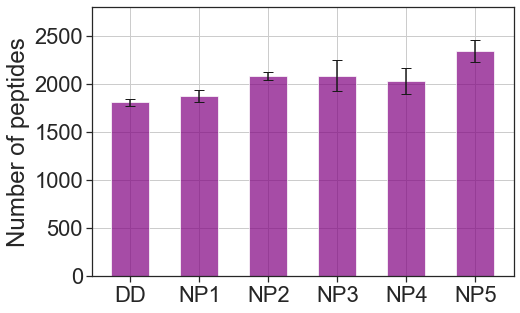

In [14]:
# peptide identifications from different NPs  ---scouting experiments

sns.set_theme(style="ticks")
plt.figure(figsize=(9,5.5),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
bar_width=0.55
plt.bar(x=name,height=pep_quan,yerr=pep_quan_error,color='purple',alpha=0.7,width=bar_width,capsize=5)
#plt.xlabel('Treatment',fontsize=24)
plt.ylabel('Number of peptides',fontsize=24)
#plt.title('DISPA',fontsize=26)
plt.xticks(fontsize=22)
#plt.xticks(rotation=20)
plt.yticks(fontsize=22)
#plt.xticks(np.arange(0, 24, 4))
plt.yticks(np.arange(0,2800, 500))
#plt.xlim(7.8,23)
plt.ylim(0,2800)
#plt.legend(fontsize=20,frameon=False)
plt.grid()
plt.subplots_adjust(left=0.25,bottom=0.2)
#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
plt.savefig('F:\\Seer_project\\figures\\pep_quan_scout.svg', dpi=800) 
plt.show()

In [15]:
procount(dir='E:\\yuming\\2023\\20230214\\csodiaq')

,0
CsoDIAq-file1_DDscout_corrected_proteinFDR.csv,245
CsoDIAq-file2_NP1scout_corrected_proteinFDR.csv,255
CsoDIAq-file3_NP1scout_2_corrected_proteinFDR.csv,240
CsoDIAq-file4_NP2scout_corrected_proteinFDR.csv,320
CsoDIAq-file5_NP2scout_2_corrected_proteinFDR.csv,247
CsoDIAq-file6_NP3scout_corrected_proteinFDR.csv,309
CsoDIAq-file7_NP4scout_corrected_proteinFDR.csv,322
CsoDIAq-file8_NP5scout_corrected_proteinFDR.csv,271
CsoDIAq-file9_NP5scout_2_corrected_proteinFDR.csv,298


In [16]:
procount(dir='E:\\yuming\\2023\\20230116\\csodiaq')

,0
CsoDIAq-file1_DD_2_SCOUT_corrected_proteinFDR.csv,262
CsoDIAq-file2_NP1_2_SCOUT_corrected_proteinFDR.csv,266
CsoDIAq-file3_NP2_2_SCOUT_corrected_proteinFDR.csv,333
CsoDIAq-file4_NP3_2_SCOUT_corrected_proteinFDR.csv,346
CsoDIAq-file5_NP4_2_SCOUT_corrected_proteinFDR.csv,293
CsoDIAq-file6_NP5_2_SCOUT_corrected_proteinFDR.csv,352


In [27]:
procount(dir='E:\\yuming\\2022\\20221121\\new folder\\csodiaq')

,0
CsoDIAq-file1_DD_corrected_proteinFDR.csv,254
CsoDIAq-file2_NP1_corrected_proteinFDR.csv,307
CsoDIAq-file3_NP2_corrected_proteinFDR.csv,393
CsoDIAq-file4_NP3_corrected_proteinFDR.csv,341
CsoDIAq-file5_NP4_corrected_proteinFDR.csv,348
CsoDIAq-file6_NP5_corrected_proteinFDR.csv,361


In [8]:

prolist_np1=procount(dir='E:\\yuming\\2023\\20230129\\NP1\\csodiaq').iloc[:,0].tolist()  #NP1    

prolist_np2=procount(dir="E:\\yuming\\2023\\20230129\\NP2\\csodiaq").iloc[:,0].tolist()    #NP2

prolist_np3=procount(dir='E:\\yuming\\2023\\20230129\\NP3\\New folder\\csodiaq2').iloc[:,0].tolist()  #NP3  

prolist_np4=procount(dir="E:\\yuming\\2023\\20230130\\NP4\\csodiaq").iloc[:,0].tolist()   # NP4

prolist_np5=procount(dir="E:\\yuming\\2023\\20230130\\NP5\\csodiaq").iloc[:,0].tolist()   # NP5

prolist_dd=procount(dir='E:\\yuming\\2023\\20230118\\csodiaq\\DD').iloc[:,0].tolist()    # DD

peplist_np1=pepcount(dir='E:\\yuming\\2023\\20230129\\NP1\\csodiaq').iloc[:,0].tolist()  #NP1 peptides    

peplist_np2=pepcount(dir="E:\\yuming\\2023\\20230129\\NP2\\csodiaq").iloc[:,0].tolist()    #NP2 peptides

peplist_np3=pepcount(dir='E:\\yuming\\2023\\20230129\\NP3\\New folder\\csodiaq2').iloc[:,0].tolist()  #NP3 peptides 

peplist_np4=pepcount(dir="E:\\yuming\\2023\\20230130\\NP4\\csodiaq").iloc[:,0].tolist()   # NP4 peptides

peplist_np5=pepcount(dir="E:\\yuming\\2023\\20230130\\NP5\\csodiaq").iloc[:,0].tolist()   # NP5 peptides

peplist_dd=pepcount(dir='E:\\yuming\\2023\\20230118\\csodiaq\\DD').iloc[:,0].tolist()    # DD peptides

In [9]:
prolist=[average(prolist_dd[3:6]),average(prolist_np1[:3]),average(prolist_np2[:3]),average(prolist_np3[:3]),average(prolist_np4[:3]),average(prolist_np5[:3])]

pro_error=[np.std(prolist_dd[3:6]),np.std(prolist_np1[:3]),np.std(prolist_np2[:3]),np.std(prolist_np3[:3]),np.std(prolist_np4[:3]),np.std(prolist_np5[:3])]

peplist=[average(peplist_dd[3:6]),average(peplist_np1[:3]),average(peplist_np2[:3]),average(peplist_np3[:3]),average(peplist_np4[:3]),average(peplist_np5[:3])]

pep_error=[np.std(peplist_dd[3:6]),np.std(peplist_np1[:3]),np.std(peplist_np2[:3]),np.std(peplist_np3[:3]),np.std(peplist_np4[:3]),np.std(peplist_np5[:3])]




In [12]:
peplist

[725.0, 807.0, 1024.0, 1085.3333333333333, 920.6666666666666, 1126.0]

In [209]:
ug1=[average(prolist_dd[0:3]),average(prolist_np1[:3]),average(prolist_np2[:3]),average(prolist_np3[:3]),average(prolist_np4[:3]),average(prolist_np5[:3])]
ug2=[average(prolist_dd[3:6]),average(prolist_np1[3:6]),average(prolist_np2[3:6]),average(prolist_np3[3:6]),average(prolist_np4[3:6]),average(prolist_np5[3:6])]
ug3=[average(prolist_dd[6:9]),average(prolist_np1[6:9]),average(prolist_np2[6:9]),average(prolist_np3[6:9]),average(prolist_np4[6:9]),average(prolist_np5[6:9])]
ug4=[average(prolist_dd[9:12]),average(prolist_np1[9:12]),average(prolist_np2[9:12]),average(prolist_np3[9:12]),average(prolist_np4[9:12]),average(prolist_np5[9:12])]



ug1_std=[np.std(prolist_dd[0:3]),np.std(prolist_np1[:3]),np.std(prolist_np2[:3]),np.std(prolist_np3[:3]),np.std(prolist_np4[:3]),np.std(prolist_np5[:3])]
ug2_std=[np.std(prolist_dd[3:6]),np.std(prolist_np1[3:6]),np.std(prolist_np2[3:6]),np.std(prolist_np3[3:6]),np.std(prolist_np4[3:6]),np.std(prolist_np5[3:6])]
ug3_std=[np.std(prolist_dd[6:9]),np.std(prolist_np1[6:9]),np.std(prolist_np2[6:9]),np.std(prolist_np3[6:9]),np.std(prolist_np4[6:9]),np.std(prolist_np5[6:9])]
ug4_std=[np.std(prolist_dd[9:12]),np.std(prolist_np1[9:12]),np.std(prolist_np2[9:12]),np.std(prolist_np3[9:12]),np.std(prolist_np4[9:12]),np.std(prolist_np5[9:12])]








In [265]:
pepug1=[average(peplist_dd[0:3]),average(peplist_np1[:3]),average(peplist_np2[:3]),average(peplist_np3[:3]),average(peplist_np4[:3]),average(peplist_np5[:3])]
pepug2=[average(peplist_dd[3:6]),average(peplist_np1[3:6]),average(peplist_np2[3:6]),average(peplist_np3[3:6]),average(peplist_np4[3:6]),average(peplist_np5[3:6])]
pepug3=[average(peplist_dd[6:9]),average(peplist_np1[6:9]),average(peplist_np2[6:9]),average(peplist_np3[6:9]),average(peplist_np4[6:9]),average(peplist_np5[6:9])]
pepug4=[average(peplist_dd[9:12]),average(peplist_np1[9:12]),average(peplist_np2[9:12]),average(peplist_np3[9:12]),average(peplist_np4[9:12]),average(peplist_np5[9:12])]



pepug1_std=[np.std(peplist_dd[0:3]),np.std(peplist_np1[:3]),np.std(peplist_np2[:3]),np.std(peplist_np3[:3]),np.std(peplist_np4[:3]),np.std(peplist_np5[:3])]
pepug2_std=[np.std(peplist_dd[3:6]),np.std(peplist_np1[3:6]),np.std(peplist_np2[3:6]),np.std(peplist_np3[3:6]),np.std(peplist_np4[3:6]),np.std(peplist_np5[3:6])]
pepug3_std=[np.std(peplist_dd[6:9]),np.std(peplist_np1[6:9]),np.std(peplist_np2[6:9]),np.std(peplist_np3[6:9]),np.std(peplist_np4[6:9]),np.std(peplist_np5[6:9])]
pepug4_std=[np.std(peplist_dd[9:12]),np.std(peplist_np1[9:12]),np.std(peplist_np2[9:12]),np.std(peplist_np3[9:12]),np.std(peplist_np4[9:12]),np.std(peplist_np5[9:12])]

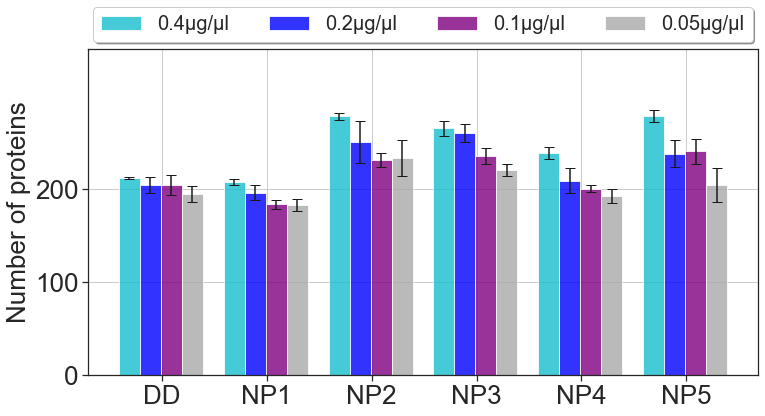

In [259]:
import matplotlib
sns.set_theme(style="ticks")
plt.figure(figsize=(12,6),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
listname1=['DD','NP1','NP2','NP3','NP4','NP5']
bar_width=0.2
plt.bar(x=range(len(listname1)),height=ug1,yerr=ug1_std, color='tab:cyan',label='0.4μg/μl',alpha=0.8,width=bar_width,capsize=5)
plt.bar(x=np.arange(len(listname1))+bar_width,height=ug2,yerr=ug2_std,color='blue',label='0.2μg/μl',alpha=0.8,width=bar_width,capsize=5)
plt.bar(x=np.arange(len(listname1))+2*bar_width,height=ug3,yerr=ug3_std, color='purple',label='0.1μg/μl',alpha=0.8,width=bar_width,capsize=5)
plt.bar(x=np.arange(len(listname1))+3*bar_width,height=ug4,yerr=ug4_std,  color='darkgray',label='0.05μg/μl',alpha=0.8,width=bar_width,capsize=5)
#plt.bar(x=np.arange(len(listname1))+4*bar_width,height=np5,yerr=np5_std,  color='darkgray',label='240k',alpha=0.8,width=bar_width)

plt.xticks(np.arange(len(listname1))+0.31, listname1)
#plt.xlabel('Concentration, μg/µl',fontsize=24)
plt.ylabel('Number of proteins',fontsize=26) 
#plt.title('10 peptide quantities',fontsize=26)
plt.xticks(fontsize=26)
#plt.xticks(rotation=60)
plt.yticks(fontsize=26)
#plt.xticks(np.arange(0, 24, 4))
plt.yticks(np.arange(0,300, 100))
#plt.xlim(7.8,23)
plt.ylim(0,350)
plt.legend(fontsize=20,loc='upper center', bbox_to_anchor=(0.5, 1.16),
          ncol=4, fancybox=True, shadow=True)
plt.grid()

#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
plt.savefig('E:\\project6 rapid profiling plasma peptides\\figures\\Pro_quan_all_target.svg', dpi=800) 
plt.show()

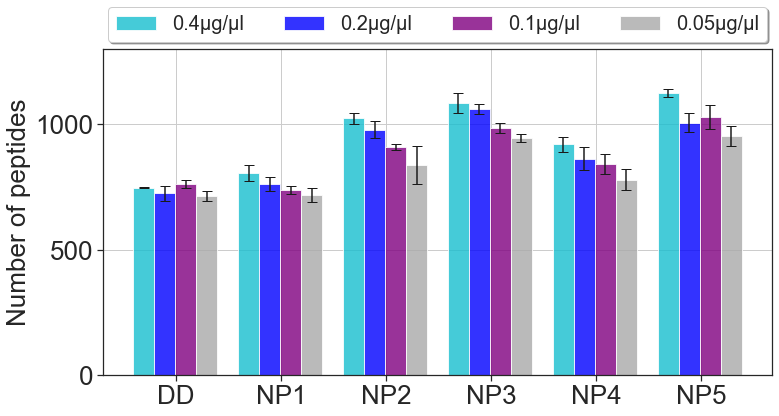

In [269]:
import matplotlib
sns.set_theme(style="ticks")
plt.figure(figsize=(12,6),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
listname1=['DD','NP1','NP2','NP3','NP4','NP5']
bar_width=0.2
plt.bar(x=range(len(listname1)),height=pepug1,yerr=pepug1_std, color='tab:cyan',label='0.4μg/μl',alpha=0.8,width=bar_width,capsize=5)
plt.bar(x=np.arange(len(listname1))+bar_width,height=pepug2,yerr=pepug2_std,color='blue',label='0.2μg/μl',alpha=0.8,width=bar_width,capsize=5)
plt.bar(x=np.arange(len(listname1))+2*bar_width,height=pepug3,yerr=pepug3_std, color='purple',label='0.1μg/μl',alpha=0.8,width=bar_width,capsize=5)
plt.bar(x=np.arange(len(listname1))+3*bar_width,height=pepug4,yerr=pepug4_std,  color='darkgray',label='0.05μg/μl',alpha=0.8,width=bar_width,capsize=5)
#plt.bar(x=np.arange(len(listname1))+4*bar_width,height=np5,yerr=np5_std,  color='darkgray',label='240k',alpha=0.8,width=bar_width)

plt.xticks(np.arange(len(listname1))+0.31, listname1)
#plt.xlabel('Concentration, μg/µl',fontsize=24)
plt.ylabel('Number of peptides',fontsize=26)
#plt.title('10 peptide quantities',fontsize=26)
plt.xticks(fontsize=26)
#plt.xticks(rotation=60)
plt.yticks(fontsize=26)
#plt.xticks(np.arange(0, 24, 4))
plt.yticks(np.arange(0,1300, 500))
#plt.xlim(7.8,23)
plt.ylim(0,1300)
plt.legend(fontsize=20,loc='upper center', bbox_to_anchor=(0.5, 1.16),
          ncol=4, fancybox=True, shadow=True)
plt.grid()

#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
plt.savefig('E:\\project6 rapid profiling plasma peptides\\figures\\Pep_quan_all_target.svg', dpi=800) 
plt.show()

In [ ]:
np1=[average(prolist_np1[:3]),average(prolist_np1[3:6]),average(prolist_np1[6:9]),average(prolist_np1[9:12])]
np2=[average(prolist_np2[:3]),average(prolist_np2[3:6]),average(prolist_np2[6:9]),average(prolist_np2[9:12])]
np3=[average(prolist_np3[:3]),average(prolist_np3[3:6]),average(prolist_np3[6:9]),average(prolist_np3[9:12])]
np4=[average(prolist_np4[:3]),average(prolist_np4[3:6]),average(prolist_np4[6:9]),average(prolist_np4[9:12])]
np5=[average(prolist_np5[:3]),average(prolist_np5[3:6]),average(prolist_np5[6:9]),average(prolist_np5[9:12])]
dd=[average(prolist_dd[:3]),average(prolist_dd[3:6]),average(prolist_dd[6:9]),average(prolist_dd[9:12])]


np1_std=[np.std(prolist_np1[:3]),np.std(prolist_np1[3:6]),np.std(prolist_np1[6:9]),np.std(prolist_np1[9:12])]
np2_std=[np.std(prolist_np2[:3]),np.std(prolist_np2[3:6]),np.std(prolist_np2[6:9]),np.std(prolist_np2[9:12])]
np3_std=[np.std(prolist_np3[:3]),np.std(prolist_np3[3:6]),np.std(prolist_np3[6:9]),np.std(prolist_np3[9:12])]
np4_std=[np.std(prolist_np4[:3]),np.std(prolist_np4[3:6]),np.std(prolist_np4[6:9]),np.std(prolist_np4[9:12])]
np5_std=[np.std(prolist_np5[:3]),np.std(prolist_np5[3:6]),np.std(prolist_np5[6:9]),np.std(prolist_np5[9:12])]
dd_std=[np.std(prolist_dd[:3]),np.std(prolist_dd[3:6]),np.std(prolist_dd[6:9]),np.std(prolist_dd[9:12])]

In [7]:

name=['DD','NP1','NP2','NP3','NP4','NP5']


In [14]:
time=[84,84,86,86,84,86]

In [15]:
z = [m/n for m, n in zip(prolist, time)]

In [16]:
z

[2.4285714285714284,
 2.4722222222222223,
 3.2325581395348837,
 3.0813953488372094,
 2.8373015873015874,
 3.2325581395348837]

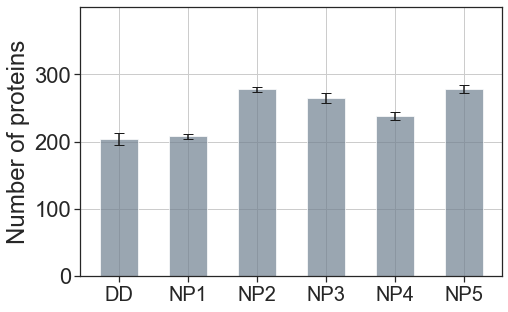

In [11]:
# protein identifications from different NPs 

sns.set_theme(style="ticks")
plt.figure(figsize=(9,5.5),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
bar_width=0.55
plt.bar(x=name,height=prolist,yerr=pro_error,color='slategrey',alpha=0.7,width=bar_width,capsize=5)
#plt.xlabel('Treatment',fontsize=24)
plt.ylabel('Number of proteins',fontsize=24)
# plt.title('DISPA',fontsize=26)
plt.xticks(fontsize=20)
#plt.xticks(rotation=20)
plt.yticks(fontsize=22)
#plt.xticks(np.arange(0, 24, 4))
plt.yticks(np.arange(0,400, 100))
#plt.xlim(7.8,23)
plt.ylim(0,400)
#plt.legend(fontsize=20,frameon=False)
plt.grid()
plt.subplots_adjust(left=0.25,bottom=0.2)
#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
plt.savefig('E:\\project6_rapid profiling plasma peptides\\figures\\pro_allnps_target.svg', dpi=800) 
plt.show()

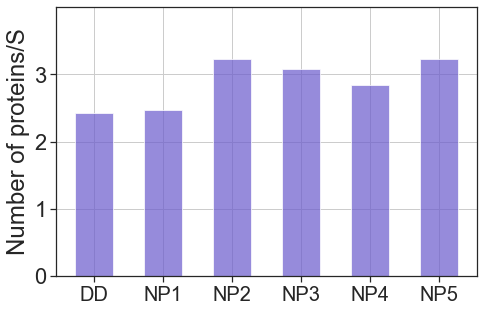

In [22]:
# protein identifications from different NPs 

sns.set_theme(style="ticks")
plt.figure(figsize=(9,5.5),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
bar_width=0.55
plt.bar(x=name,height=z,color='slateblue',alpha=0.7,width=bar_width,capsize=5)
#plt.xlabel('Treatment',fontsize=24)
plt.ylabel('Number of proteins/S',fontsize=24)
# plt.title('DISPA',fontsize=26)
plt.xticks(fontsize=20)
#plt.xticks(rotation=20)
plt.yticks(fontsize=22)
#plt.xticks(np.arange(0, 24, 4))
plt.yticks(np.arange(0,4, 1))
#plt.xlim(7.8,23)
plt.ylim(0,4)
#plt.legend(fontsize=20,frameon=False)
plt.grid()
plt.subplots_adjust(left=0.25,bottom=0.2)
#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
plt.savefig('E:\\project6_rapid profiling plasma peptides\\figures\\time_sec.svg', dpi=800) 
plt.show()

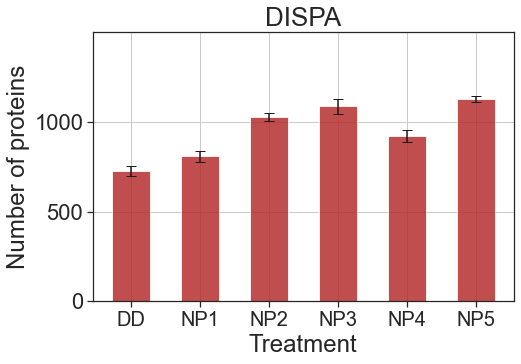

In [196]:
# peptide identifications from different NPs 

sns.set_theme(style="ticks")
plt.figure(figsize=(9,5.5),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
bar_width=0.55
plt.bar(x=name,height=peplist,yerr=pep_error,color='firebrick',alpha=0.8,width=bar_width,capsize=5)
plt.xlabel('Treatment',fontsize=24)
plt.ylabel('Number of proteins',fontsize=24)
plt.title('DISPA',fontsize=26)
plt.xticks(fontsize=20)
#plt.xticks(rotation=20)
plt.yticks(fontsize=22)
#plt.xticks(np.arange(0, 24, 4))
plt.yticks(np.arange(0,1500, 500))
#plt.xlim(7.8,23)
plt.ylim(0,1500)
#plt.legend(fontsize=20,frameon=False)
plt.grid()
plt.subplots_adjust(left=0.25,bottom=0.2)
#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
plt.show()

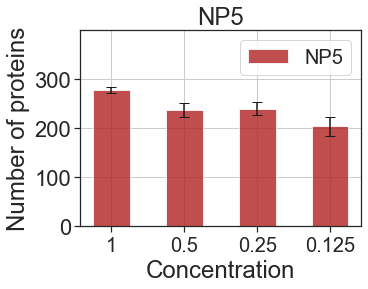

In [154]:

sns.set_theme(style="ticks")
plt.figure(figsize=(6,4),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
bar_width=0.5
plt.bar(x=name2,height=prolist2,yerr=np5_std,color='firebrick',alpha=0.8,width=bar_width,capsize=5,label='NP5')
#plt.errorbar(name2,prolist_np5,yerr=np5_std,color='firebrick',label='NP5', marker='o',ms = 5,linewidth=2,capsize=6,linestyle='dotted')
#plt.errorbar(name2,prolist_np4,yerr=np4_std,color='blue',label='NP4', marker='o',ms = 5,linewidth=2,capsize=6,linestyle='dotted')
#plt.errorbar(name2,prolist_np3,yerr=np3_std,color='green',label='NP3', marker='o',ms = 5,linewidth=2,capsize=6,linestyle='dotted')
#plt.errorbar(name2,prolist_np2,yerr=np2_std,color='purple',label='NP2', marker='o',ms = 5,linewidth=2,capsize=6,linestyle='dotted')
#plt.errorbar(name2,prolist_np1,yerr=np1_std,color='orange',label='NP1', marker='o',ms = 5,linewidth=2,capsize=6,linestyle='dotted')
#plt.errorbar(name2,prolist_dd,yerr=dd_std,color='grey',label='DD', marker='o',ms = 5,linewidth=2,capsize=6,linestyle='dotted')
plt.xlabel('Concentration',fontsize=24)
plt.ylabel('Number of proteins',fontsize=24)
plt.title('NP5',fontsize=24)
plt.xticks(fontsize=20)
#plt.xticks(rotation=20)
plt.yticks(fontsize=22)
#plt.xticks(np.arange(0, 24, 4))
plt.yticks(np.arange(0,400, 100))
#plt.xlim(7.8,23)
plt.ylim(0,400)
plt.legend(fontsize=20)
plt.grid()
plt.subplots_adjust(left=0.25,bottom=0.2)
#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
#plt.savefig('D:\\Project 2 DIrect infusion shotgun proteome analysis\\robust and reproducibility\\CV analysis_protein.svg', dpi=600) 
plt.show()

In [161]:
def plot_single_np(title='NP5',figname='pros_np5',xvalue=name2,yvalue=prolist_np5,yerror=np5_std):

    sns.set_theme(style="ticks")
    plt.figure(figsize=(6,4),edgecolor="#04253a")
    matplotlib.rcParams['font.family'] = "Arial"
    bar_width=0.5
    plt.bar(x=xvalue,height=yvalue,yerr=yerror,color='firebrick',alpha=0.8,width=bar_width,capsize=5,label=title)
    #plt.errorbar(name2,prolist_np5,yerr=np5_std,color='firebrick',label='NP5', marker='o',ms = 5,linewidth=2,capsize=6,linestyle='dotted')
    plt.xlabel('Concentration',fontsize=24)
    plt.ylabel('Number of proteins',fontsize=24)
    plt.title(title,fontsize=24)
    plt.xticks(fontsize=20)
    #plt.xticks(rotation=20)
    plt.yticks(fontsize=22)
    #plt.xticks(np.arange(0, 24, 4))
    plt.yticks(np.arange(0,400, 100))
    #plt.xlim(7.8,23)
    plt.ylim(0,400)
    plt.legend(fontsize=20)
    plt.grid()
    plt.subplots_adjust(left=0.25,bottom=0.2)
    #plt.tight_layout()
    #plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0,frameon=False)
    #plt.savefig('D:\\Project 2 DIrect infusion shotgun proteome analysis\\robust and reproducibility\\CV analysis_protein.svg', dpi=600) 
    fig_path= 'E:\\project6 rapid profiling plasma peptides\\figures\\'
    plt.savefig(fig_path + "%s.svg" % figname,dpi=600, bbox_inches='tight')  
    plt.show()

In [16]:
a=count2(dir='E:\\yuming\\2023\\20230202\\New folder\\20230202\\csodiaq').iloc[:,0].tolist()

In [21]:
new=[]
for value in a:
    if value>1:
        new.append(value)
new

[1067,
 1057,
 1174,
 1143,
 1202,
 1200,
 1157,
 1143,
 997,
 1068,
 1152,
 1107,
 1149,
 1062,
 944,
 969,
 1181,
 1000,
 1127,
 1068,
 1029,
 1062,
 999,
 967,
 1100,
 933,
 1089,
 841,
 991,
 1020,
 1150,
 1154,
 1176,
 1056,
 1129,
 1044,
 917,
 934,
 917,
 908,
 938,
 877,
 840,
 907,
 753,
 856,
 1016,
 1101,
 863,
 946,
 1045,
 1022,
 1005,
 988,
 1064,
 838,
 951,
 1073,
 1071,
 1017,
 1087,
 1052,
 1074,
 1148,
 974,
 1104,
 1030,
 1090,
 1162,
 1025,
 934,
 970,
 982,
 921,
 875,
 1068,
 919,
 945,
 837,
 813,
 867,
 993]

In [23]:
num_bins=10

Text(0.5, 1.0, 'number of proteins')

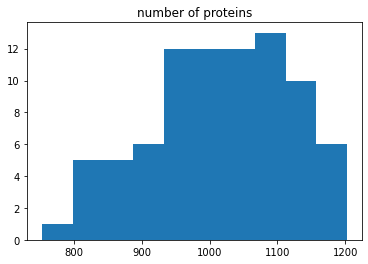

In [24]:
num_bins=10
plt.hist(new,num_bins)
plt.title('number of proteins')

Text(0.5, 1.0, 'number of m/z features')

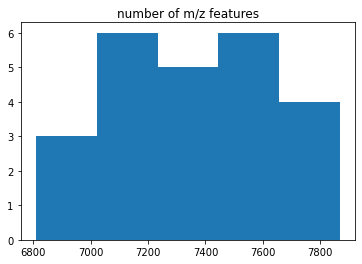

In [38]:
plt.hist(meta,num_bins)
plt.title('number of m/z features')

In [7]:
count(dir='E:\\yuming\\2023\\20230123\\scout')

,0
CsoDIAq-file1_scout_multi_96well_corrected_proteinFDR.csv,521
CsoDIAq-file2_scout_multi_96well2_corrected_proteinFDR.csv,598
CsoDIAq-file3_scout_multi_96well3_corrected_proteinFDR.csv,683
CsoDIAq-file1_scout_multi_96well4_corrected_proteinFDR.csv,463
CsoDIAq-file1_scout_multi_96well5_corrected_proteinFDR.csv,595


In [83]:
count(dir='E:\\yuming\\2023\\20230118\\csodiaq\\DD')

[213, 212, 211, 197, 199, 216, 211, 189, 213, 184, 196, 205]

In [15]:
count(dir='E:\\yuming\\2023\\20230118\\csodiaq\\NP1')

,0
CsoDIAq-file1_NP1_1_corrected_proteinFDR.csv,145
CsoDIAq-file2_NP1_2_corrected_proteinFDR.csv,157
CsoDIAq-file3_NP1_2X_corrected_proteinFDR.csv,152
CsoDIAq-file4_NP1_2X2_corrected_proteinFDR.csv,175
CsoDIAq-file5_NP1_2X3_corrected_proteinFDR.csv,150
CsoDIAq-file6_NP1_3_corrected_proteinFDR.csv,156
CsoDIAq-file7_NP1_4X_corrected_proteinFDR.csv,141
CsoDIAq-file8_NP1_4X2_corrected_proteinFDR.csv,0
CsoDIAq-file9_NP1_4X3_corrected_proteinFDR.csv,0
CsoDIAq-file10_NP1_8X_corrected_proteinFDR.csv,127


In [17]:
count(dir='E:\\yuming\\2023\\20230118\\csodiaq\\NP2')

,0
CsoDIAq-file1_NP2_1_corrected_proteinFDR.csv,154
CsoDIAq-file2_NP2_2_corrected_proteinFDR.csv,152
CsoDIAq-file3_NP2_2X_corrected_proteinFDR.csv,158
CsoDIAq-file4_NP2_2X2_corrected_proteinFDR.csv,183
CsoDIAq-file5_NP2_2X3_corrected_proteinFDR.csv,173
CsoDIAq-file6_NP2_3_corrected_proteinFDR.csv,156
CsoDIAq-file7_NP2_4X_corrected_proteinFDR.csv,0
CsoDIAq-file8_NP2_4X2_corrected_proteinFDR.csv,137
CsoDIAq-file9_NP2_4X3_corrected_proteinFDR.csv,140
CsoDIAq-file10_NP2_8X_corrected_proteinFDR.csv,170


In [18]:
count(dir='E:\\yuming\\2023\\20230118\\csodiaq\\NP3')

,0
CsoDIAq-file1_NP3_1_corrected_proteinFDR.csv,184
CsoDIAq-file2_NP3_2_corrected_proteinFDR.csv,167
CsoDIAq-file3_NP3_2X_corrected_proteinFDR.csv,174
CsoDIAq-file4_NP3_2X2_corrected_proteinFDR.csv,182
CsoDIAq-file5_NP3_2X3_corrected_proteinFDR.csv,190
CsoDIAq-file6_NP3_3_corrected_proteinFDR.csv,183
CsoDIAq-file7_NP3_4X_corrected_proteinFDR.csv,184
CsoDIAq-file8_NP3_4X2_corrected_proteinFDR.csv,193
CsoDIAq-file9_NP3_4X3_corrected_proteinFDR.csv,159
CsoDIAq-file10_NP3_8X_corrected_proteinFDR.csv,168


In [19]:
count(dir='E:\\yuming\\2023\\20230118\\csodiaq\\NP4')

,0
CsoDIAq-file1_NP4_1_corrected_proteinFDR.csv,164
CsoDIAq-file2_NP4_2_corrected_proteinFDR.csv,159
CsoDIAq-file3_NP4_2X_corrected_proteinFDR.csv,180
CsoDIAq-file4_NP4_2X2_corrected_proteinFDR.csv,148
CsoDIAq-file5_NP4_2X3_corrected_proteinFDR.csv,170
CsoDIAq-file6_NP4_3_corrected_proteinFDR.csv,155
CsoDIAq-file7_NP4_4X_corrected_proteinFDR.csv,159
CsoDIAq-file8_NP4_4X2_corrected_proteinFDR.csv,155
CsoDIAq-file9_NP4_4X3_corrected_proteinFDR.csv,138
CsoDIAq-file10_NP4_8X_corrected_proteinFDR.csv,154


In [20]:
count(dir='E:\\yuming\\2023\\20230118\\csodiaq\\NP5')

,0
CsoDIAq-file1_NP5_1_corrected_proteinFDR.csv,0
CsoDIAq-file2_NP5_2_corrected_proteinFDR.csv,151
CsoDIAq-file3_NP5_2X_corrected_proteinFDR.csv,161
CsoDIAq-file4_NP5_2X2_corrected_proteinFDR.csv,156
CsoDIAq-file5_NP5_2X3_corrected_proteinFDR.csv,154
CsoDIAq-file6_NP5_3_corrected_proteinFDR.csv,0
CsoDIAq-file7_NP5_4X_corrected_proteinFDR.csv,0
CsoDIAq-file8_NP5_4X2_corrected_proteinFDR.csv,151
CsoDIAq-file9_NP5_4X3_corrected_proteinFDR.csv,162
CsoDIAq-file10_NP5_8X_corrected_proteinFDR.csv,168


In [21]:
count(dir='E:\\yuming\\2023\\20230118\\csodiaq\\NPmix')

,0
CsoDIAq-file1_NPmix_1_corrected_proteinFDR.csv,153
CsoDIAq-file2_NPmix_2_corrected_proteinFDR.csv,152
CsoDIAq-file3_NPmix_2X_corrected_proteinFDR.csv,163
CsoDIAq-file4_NPmix_2X2_corrected_proteinFDR.csv,160
CsoDIAq-file5_NPmix_2X3_corrected_proteinFDR.csv,174
CsoDIAq-file6_NPmix_3_corrected_proteinFDR.csv,0
CsoDIAq-file7_NPmix_4X_corrected_proteinFDR.csv,151
CsoDIAq-file8_NPmix_4X2_corrected_proteinFDR.csv,146
CsoDIAq-file9_NPmix_4X3_corrected_proteinFDR.csv,139
CsoDIAq-file10_NPmix_8X_corrected_proteinFDR.csv,127


In [22]:
count(dir='E:\\yuming\\2023\\20230117\\csodiaq')

,0
CsoDIAq-file1_SCOUT_DD_corrected_proteinFDR.csv,244
CsoDIAq-file2_SCOUT_NP1_corrected_proteinFDR.csv,248
CsoDIAq-file3_SCOUT_NP2_corrected_proteinFDR.csv,246
CsoDIAq-file4_SCOUT_NP3_corrected_proteinFDR.csv,284
CsoDIAq-file5_SCOUT_NP4_corrected_proteinFDR.csv,274
CsoDIAq-file6_SCOUT_NP5_corrected_proteinFDR.csv,263


In [23]:
count(dir='E:\\yuming\\2023\\20230116\\csodiaq')

,0
CsoDIAq-file1_DD_2_SCOUT_corrected_proteinFDR.csv,262
CsoDIAq-file2_NP1_2_SCOUT_corrected_proteinFDR.csv,266
CsoDIAq-file3_NP2_2_SCOUT_corrected_proteinFDR.csv,333
CsoDIAq-file4_NP3_2_SCOUT_corrected_proteinFDR.csv,346
CsoDIAq-file5_NP4_2_SCOUT_corrected_proteinFDR.csv,293
CsoDIAq-file6_NP5_2_SCOUT_corrected_proteinFDR.csv,352


In [24]:
count2(dir='E:\\yuming\\2023\\20230130\\NP5\\csodiaq')

,0
CsoDIAq-file1_SCOUT_NP5_corrected_proteinFDR.csv,285
CsoDIAq-file1_NP5_1_corrected_proteinFDR.csv,258
CsoDIAq-file2_NP5_1_2_corrected_proteinFDR.csv,225
CsoDIAq-file3_NP5_2_corrected_proteinFDR.csv,223
CsoDIAq-file4_NP5_2_2_corrected_proteinFDR.csv,243
CsoDIAq-file5_NP5_4_corrected_proteinFDR.csv,188
CsoDIAq-file6_NP5_4_2_corrected_proteinFDR.csv,230
CsoDIAq-file7_NP5_8_corrected_proteinFDR.csv,285
CsoDIAq-file8_NP5_8_2_corrected_proteinFDR.csv,279


In [20]:
count(dir='E:\\yuming\\2023\\20230129\\NP2\\csodiaq')


[245, 206, 232, 279, 282, 273, 278, 269, 276, 241, 223, 230]

In [3]:

plasma_pro = []
dir = "E:\\yuming\\2023\\20230118\\csodiaq\\DD"
for file in os.listdir(dir):
    if file.endswith(".csv") and 'proteinFDR' in file:
        plasma_pro.append(os.path.join(dir, file))
plasma_pro

['E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file1_DD_1_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file2_DD_2_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file3_DD_2X_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file4_DD_2X2_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file5_DD_2X3_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file6_DD_3_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file7_DD_4X_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file8_DD_4X2_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file9_DD_4X3_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file10_DD_8X_corrected_proteinFDR.csv',
 'E:\\yuming\\2023\\20230118\\csodiaq\\DD\\CsoDIAq-file11_DD_8X2_corrected_proteinFDR.csv',
 'E:\\